# Use NLP to process the review texts and use that to predict positive/negtive reviews difined using stars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Create the features and labels

### Load the review data

In [2]:
df = pd.read_csv('data/reviews_last2years_LV_restaurants.csv')

In [3]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,name,categories,avg_stars
0,--9e1ONYQuAa-CB_Rrw7Tw,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0
1,--9e1ONYQuAa-CB_Rrw7Tw,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0
2,--9e1ONYQuAa-CB_Rrw7Tw,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0
3,--9e1ONYQuAa-CB_Rrw7Tw,0,2017-05-20,0,Pnkrj90xfykhHyo4BSFRsw,5,ABSOLUTE MUST IN VEGAS! Loved everything my bo...,0,cZVQGCZ_fHtTdfiyGVJPdg,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0
4,--9e1ONYQuAa-CB_Rrw7Tw,0,2017-12-30,0,Oeh7e6U2xaDQI9L9i4x_Gw,2,I had high hopes for Delmonico's Steakhouse in...,0,li2cBZl60vgqihDJJG7jeA,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90788 entries, 0 to 90787
Data columns (total 12 columns):
business_id    90788 non-null object
cool           90788 non-null int64
date           90788 non-null object
funny          90788 non-null int64
review_id      90788 non-null object
stars          90788 non-null int64
text           90788 non-null object
useful         90788 non-null int64
user_id        90788 non-null object
name           90788 non-null object
categories     90788 non-null object
avg_stars      90788 non-null float64
dtypes: float64(1), int64(4), object(7)
memory usage: 8.3+ MB


### Define the postive/negative label

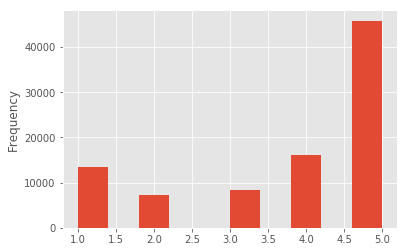

In [5]:
df['stars'].plot.hist()

About half the reviews have starts==5, so to make positive/negative even, we define positive with stars==5

In [6]:
df['favorable'] = (df['stars'] > 4).astype(int)

In [7]:
y = df['favorable'].values

In [8]:
print(y.shape)
print(y.dtype)

(90788,)
int32


In [9]:
y[:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [10]:
y.mean(), y.std()

(0.5045490593470503, 0.4999793056308001)

### Get the features, which are the review texts

In [11]:
X = df['text'].values

In [12]:
print(X.dtype)
print(X.shape)

object
(90788,)


In [13]:
X[:5]

array(["went for dinner tonight. Amazing my husband had lobster bisque and the T bone both were delish.I had the French onion soup and the pan seared duck. Cooked to perfection and I'm still raving about the flavor. If you are ever in Vegas this is a must try.",
       'This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return.',
       "Went for a nice anniversary dinner. Researched a lot of steakhouses and thought this was reasonably priced (compared to others) for Vegas so thought we'd give it a shot. made reservations but was not crowded on a Monday night. We split the bbq shrimp which were very good for an appetizer. Then we each had salads. I ordered the filet mignon which was a small 6oz serving for $50. I could've easily eaten 2 of them. But the steak was very tender and nicely seasoned. Husband had the bone in ribeye which is what they are known for. He enjoyed it. We split the mashed potatoes which were very good, but kinda hard to screw those up. 

Split the data into train/test, I do this first because if we use the tfidf vectorizer to fit_transform all the texts, the computer will crush. Also we only use 20% data to train.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

Get the TF-IDF representation of the texts

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [18]:
X_train = vectorizer.fit_transform(X_train).toarray()

In [19]:
X_test = vectorizer.transform(X_test).toarray()

In [20]:
vocab = vectorizer.get_feature_names()

In [21]:
len(vocab)

5000

In [22]:
X_train.shape, X_test.shape

((18157, 5000), (72631, 5000))

## Model training

### Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
model_lr.score(X_train, y_train)

0.87332709147987

In [25]:
model_lr.score(X_test, y_test)

0.8342167944816952

Define a fuction to print the top k important words for postive/negative reviews

In [26]:
def top_k_values(coefs, k, vocab):
    return [vocab[i] for i in np.argsort(coefs)[-k:]]

def bottom_k_values(coefs, k, vocab):
    return [vocab[i] for i in np.argsort(coefs)[:k]]

In [27]:
top_k_values(model_lr.coef_[0], 20, vocab)

['thanks',
 'definitely',
 'perfectly',
 'die',
 'loved',
 'wonderful',
 'perfect',
 'bomb',
 'favorite',
 'thank',
 'incredible',
 'great',
 'fantastic',
 'excellent',
 'love',
 'highly',
 'awesome',
 'delicious',
 'best',
 'amazing']

In [28]:
bottom_k_values(model_lr.coef_[0], 20, vocab)

['ok',
 'worst',
 'bad',
 'horrible',
 'disappointing',
 'slow',
 'bland',
 'rude',
 'reason',
 'terrible',
 'okay',
 'didn',
 'unfortunately',
 'mediocre',
 'salty',
 'wasn',
 'decent',
 'average',
 'asked',
 'overpriced']

### Naive bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
model_nb.score(X_train, y_train)

0.8447430742964146

In [31]:
model_nb.score(X_test, y_test)

0.817667387203811

### Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': 50,
              'max_depth': 20,
              'max_features': 'auto',
              'min_samples_leaf': 10,
              'n_jobs': -1
             }

model_rf = RandomForestClassifier(**parameters)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
model_rf.score(X_train, y_train)

0.8134603734097042

In [34]:
model_rf.score(X_test, y_test)

0.7854359708664345

In [35]:
top_k_values(model_rf.feature_importances_, 20, vocab)

['said',
 'love',
 'told',
 'don',
 'pretty',
 'wasn',
 'horrible',
 'like',
 'definitely',
 'bad',
 'awesome',
 'didn',
 'ok',
 'friendly',
 'asked',
 'worst',
 'delicious',
 'best',
 'amazing',
 'great']

### Use CV to evaluate the models

In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_lr,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='accuracy'
                           )
cv_scores

array([0.83535242, 0.83865639, 0.83778573, 0.8320022 , 0.81988433])

### Use grid search to find the best parameter set

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'penalty': ['l1', 'l2'], 'C':[0.1, 1, 10]}

scores = ['accuracy']

for score in scores:
    print('Tuning hyper-parameters for %s' % score + '\n\n')
    clf = GridSearchCV(LogisticRegression(),
                       param_grid,
                       cv=5,
                       scoring=score
                      )
    clf.fit(X_train[:500,:], y_train[:500])
    print('Best parameters found:\n\n')
    print(clf.best_params_)
    y_pred = clf.predict(X_train)
    print(classification_report(y_train, y_pred))
             

Tuning hyper-parameters for accuracy


Best parameters found:


{'C': 1, 'penalty': 'l2'}
             precision    recall  f1-score   support

          0       0.71      0.86      0.78      9015
          1       0.83      0.65      0.73      9142

avg / total       0.77      0.76      0.75     18157



## Build a search engine for similar reviews

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

query = X[18]
queries = [query]

print(query)

I ordered the filet mignon, not the best I had. Cooked right but not as tender. The sides were much better. We had the creamed corn and potatoes au gratin, my favorite. We ordered some kind of butter cake for dessert. No one at our table liked it. One of the servers overheard us talking about the cake and the waiter immediately came and took it off the tab. They do have great service and the decor is nice but with so many great restaurants in the city, I don't need to go back.


In [39]:
vector_query = vectorizer.transform(queries).toarray()

In [40]:
vector_query.shape

(1, 5000)

In [43]:
similarity_scores = cosine_similarity(vector_query, X_test[:100])

In [ ]:
top_k_values(X_test, 5, similarity_scores)